# *Jupyter Mia!* - my Jupyter Project

**Web Scraping and Linguistic Analysis**

In my *Jupyter Mia!* project, I used Python to perform linguistic analysis of the [script](https://pdfcoffee.com/mamma-mia-the-musical-script-pdf-free.html) of Mamma Mia! musical from 1999. I utilized the **requests** and **BeautifulSoup** libraries to extract content from a specific URL through web scraping. Additionally, I employed the **Natural Language Toolkit (NLTK)** library to handle various language processing tasks:
*   Tokenization and POS Tagging
*   POS tag frequency analysis
*   Word frequency analysis
*   Word length analysis

# βήμα πρώτο - step one

Let me import the modules

As my *το πρώτο βήμα*  of the analysis, I have to import the required modules:

In [1]:
import requests
from bs4 import BeautifulSoup
import nltk
nltk.download('all')
from collections import Counter
import re
import matplotlib.pyplot as plt

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping grammars/basque_grammars.zip.
[nltk_data]    | Downloading package bcp47 to /root/nltk_data...
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   U

I used **Requests** and **BeautifulSoup** to enable web scraping.

**Counter**, **nltk** to enable data analysis and **matplotlib** to create a chart.

# βήμα δυο - step two

Let's do some web scraping

In [2]:
page = requests.get("https://pdfcoffee.com/mamma-mia-the-musical-script-pdf-free.html")

soup = BeautifulSoup(page.content, 'html.parser')

paragraphs = soup.find_all('p')

only_text = []

for el in paragraphs:
    if len(el.getText().strip()) > 0:
        only_text.append(el.getText())

The text explains that **Requests** is used to fetch text from a provided website address and **BeautifulSoup** is used to parse the HTML content. It then finds all paragraph elements using **soup.find_all("p")** and adds the text to a list after removing any unnecessary spaces.

# βήμα τρίτο - step three

Now some tokenization and part-of-speech tagging

In [3]:
pos_tagged_tokens = []

for sentence in only_text:
    tokens = nltk.word_tokenize(sentence)
    pos_tagged = nltk.pos_tag(tokens)
    for item in pos_tagged:
        pos_tagged_tokens.append(item)

Next, the text is tokenized into words using **nltk.word_tokenize()** and then tagged for parts of speech using **nltk.pos_tag()**. The resulting POS tags are stored in a list.

# βήμα τέταρτο - step four

How often particular POS Tag occur?

In [4]:
pos_tags_list = [tag for word, tag in pos_tagged_tokens]
pos_tag_counts = Counter(pos_tags_list)
print(pos_tag_counts)

Counter({'NNP': 7076, 'NN': 1586, 'PRP': 1454, '.': 1185, 'VBP': 942, 'IN': 701, 'DT': 670, ':': 664, ',': 655, 'JJ': 617, 'RB': 545, 'VB': 511, 'VBD': 375, 'VBZ': 285, 'NNS': 270, 'CC': 245, 'PRP$': 197, 'TO': 196, '(': 189, ')': 188, 'VBG': 147, 'VBN': 135, 'CD': 129, 'WP': 120, 'MD': 101, 'UH': 94, 'RP': 73, 'WRB': 73, 'JJR': 25, "''": 14, 'PDT': 14, 'WDT': 11, 'EX': 10, '#': 8, 'JJS': 8, 'RBR': 6, 'FW': 5, 'NNPS': 5, '$': 2, '``': 1, 'POS': 1, 'SYM': 1})


I used **Counter** to count the occurrence of each Part-of-Speech tag.

To display only 7 most common parts of speech, I used **.most_common(7)** method.

I decided to colour the bars **deep sky blue**, if you know the musical, the reason is quite obvious!

[('NNP', 7076), ('NN', 1586), ('PRP', 1454), ('.', 1185), ('VBP', 942), ('IN', 701), ('DT', 670)]


<BarContainer object of 7 artists>

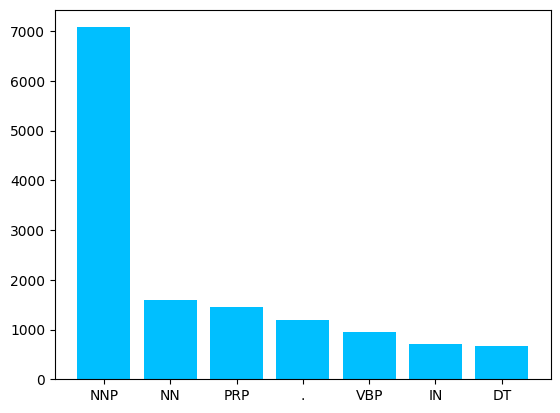

In [5]:
most_common_pos = pos_tag_counts.most_common(7)
print(most_common_pos)
tags, counts = zip(*most_common_pos)
plt.bar(tags[0:8], counts[0:8], color = "deepskyblue")

The seven most common POS tags and their counts are paired using **zip(most_common_pos)**, and a bar graph is displayed using **plt.bar()**.

# βήμα πέντε - step five

And now, how often particular words occur?

In [6]:
all_text = ' '.join(only_text)

def find_word_frequency(word):
  pattern = fr'\b{word}\b'
  matches = re.findall(pattern, all_text, re.IGNORECASE)
  return f"The total number of the word in the text: {len(matches)}"

print(find_word_frequency("donna"))

The total number of the word in the text: 246


A function named **find_word_frequency()** is defined to determine how often a specific word appears in a given text. The function takes a string as input and uses a **regex** pattern with \b for word boundaries and a **formatted string** to incorporate the word into the pattern.

# βήμα έκτο - step six

Measuring the length of the words

In [7]:
words = re.findall(r'\b\w+\b', all_text)
word_lengths = [len(word) for word in words]
length_freq = Counter(word_lengths)
print(length_freq)

Counter({3: 3486, 4: 3073, 2: 2675, 5: 2248, 1: 1810, 6: 1104, 7: 760, 8: 399, 9: 122, 10: 73, 11: 32, 12: 18, 13: 9, 14: 3, 16: 1, 22: 1})


After joining the text into one string (I did it a step earlier), regular expressions find all words by matching word boundaries and sequences of word characters. A list comprehension measures each word's length, and **Counter** calculates the frequency of each length.

In [8]:
print(length_freq.most_common(10))

[(3, 3486), (4, 3073), (2, 2675), (5, 2248), (1, 1810), (6, 1104), (7, 760), (8, 399), (9, 122), (10, 73)]


The **.most_common() method** is used to show only the most frequently occurring letters in a word.

In [9]:
total_words = len(words)

total_letters = 0
for word in words:
  total_letters += len(word)

avg_letters_for_words = total_letters / total_words

print(f"Average word length: {avg_letters_for_words}")

Average word length: 3.7232199317060832


The total number of words in the text is determined using the **len** function. Then, the length of each word is summed. The average word length is calculated by dividing the total number of letters by the total number of words.

# Sophie and Sky walk off into the horizon as lights fade to black and curtain closes.

And that's the end of my *Jupyter Mia!* project.

I hope that I have successfully used linguistic analysis tools through the use of Python.

I managed to successfully, although with many initial failures, complete: Web Scraping, Tokenization and POS Tagging, POS Tag Frequency Analysis, Word Length Analysis, and Word Frequency Analysis.